<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [19]:
import pandas as pd

Load the dataset into a dataframe.


In [66]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-21-c8f383c8b0fc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], kde = True, color ='red', bins = 20,hist=False)


Text(0.5, 1.0, 'Distribution curve for ConvertedComp')

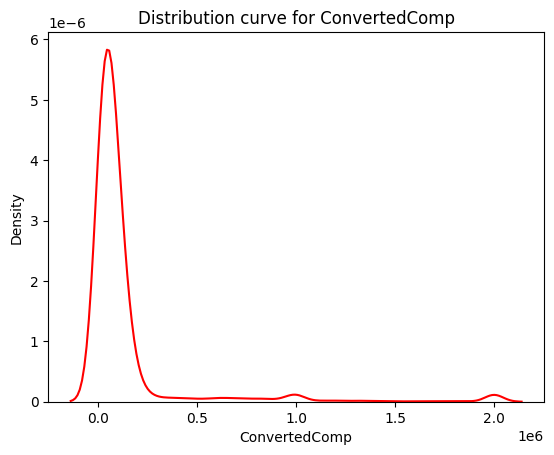

In [21]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['ConvertedComp'], kde = True, color ='red', bins = 20,hist=False)
plt.title("Distribution curve for ConvertedComp")





Plot the histogram for the column `ConvertedComp`.


Text(0.5, 1.0, 'Histogram Plot for ConvertedComp')

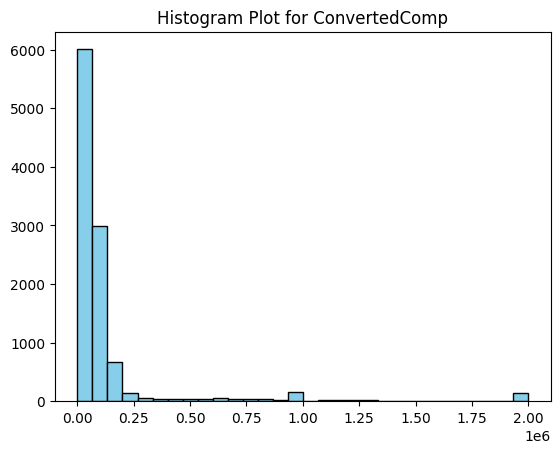

In [22]:
# your code goes here
import matplotlib.pyplot as plt
plt.hist(df["ConvertedComp"], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram Plot for ConvertedComp")

What is the median of the column `ConvertedComp`?


In [23]:
# your code goes here
median = df["ConvertedComp"].median()
print("ConvertedComp median value is:",median)

ConvertedComp median value is: 57745.0


How many responders identified themselves only as a **Man**?


In [24]:
# your code goes here


Value_counts = df['Gender'].value_counts()
print(Value_counts)

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [28]:
# your code goes here
df_woman = df[df["Gender"]=="Woman"]
df_woman["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [32]:
# your code goes here
df["Age"].describe()



count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Text(0.5, 1.0, 'Histogram Plot for Age')

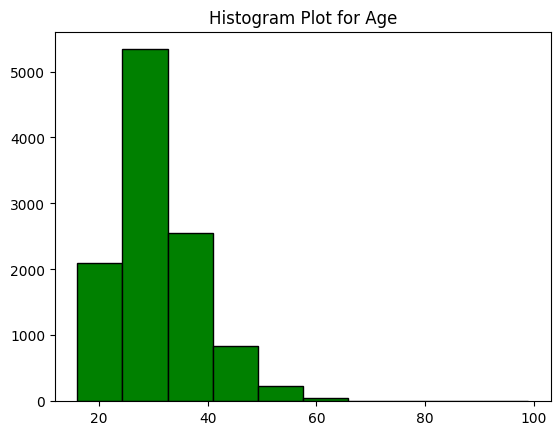

In [37]:
# your code goes here
import matplotlib.pyplot as plt
plt.hist(df["Age"], bins=10, color='green',edgecolor='black' )
plt.title("Histogram Plot for Age")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<Axes: ylabel='ConvertedComp'>

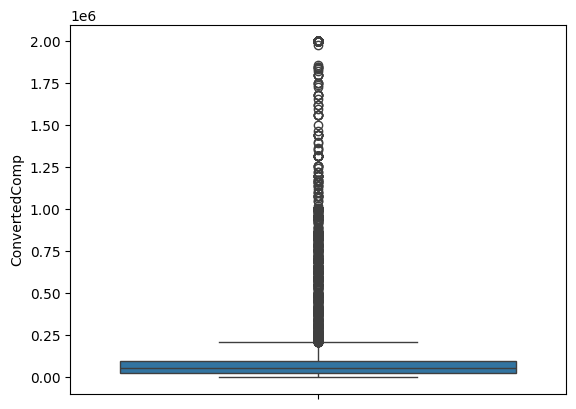

In [38]:
# your code goes here
import seaborn as sns
sns.boxplot(df["ConvertedComp"])

<Axes: ylabel='Age'>

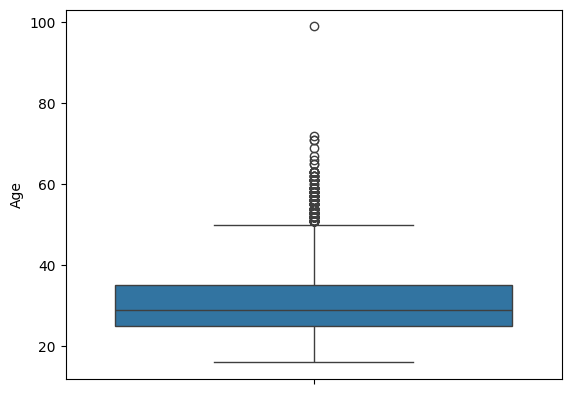

In [90]:
import seaborn as sns
sns.boxplot(df["Age"])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [87]:
# your code goes here
count,mean,std,min,Q1,Q2,Q3,max = df["ConvertedComp"].describe()
Quartile_Range= Q3-Q1
print(Quartile_Range,Q2)

73132.0 57745.0


Find out the upper and lower bounds.


In [45]:
# your code goes here
count,mean,std,min,Q1,Q2,Q3,max = df["ConvertedComp"].describe()
Quartile_Range= Q3-Q1
value = 1.5*Quartile_Range
upper_bound=Q3+value
lower_bound=Q1-value
print(upper_bound,lower_bound)

209698.0 -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [67]:
# your code goes here
df_outliers = (df["ConvertedComp"]> upper_bound) | (df["ConvertedComp"]< lower_bound)
df_outliers.value_counts()

ConvertedComp
False    10519
True       879
Name: count, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [89]:
# your code goes here
filtered_df = df[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]
filtered_df.describe()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,9703.000000,9.703000e+03,9703.000000,9664.000000,7612.000000,9493.000000
mean,12501.007317,7.241139e+05,59883.208389,41.864782,4.737455,30.695860
std,7235.627217,7.186806e+06,43394.336755,24.613489,4.420472,7.346625
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6237.000000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12571.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18787.500000,1.150000e+05,85574.500000,42.000000,5.000000,34.000000
max,25141.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [86]:
# your code goes here
import pandas as pd

# Select only numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.013490       0.002181    -0.015314    0.004621   
CompTotal       -0.013490   1.000000       0.001037     0.003510    0.007063   
ConvertedComp    0.002181   0.001037       1.000000     0.021143   -0.033865   
WorkWeekHrs     -0.015314   0.003510       0.021143     1.000000    0.026517   
CodeRevHrs       0.004621   0.007063      -0.033865     0.026517    1.000000   
Age              0.004041   0.006970       0.105386     0.036518   -0.020469   

                    Age  
Respondent     0.004041  
CompTotal      0.006970  
ConvertedComp  0.105386  
WorkWeekHrs    0.036518  
CodeRevHrs    -0.020469  
Age            1.000000  


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
